#                   Predicting  Type of Chocolate People like

## Rishabh

May 19,2020

## 1. Introduction:

#### Background

Location plays a very critical role in the success or downfall of any offline business. I will be taking the example of chocolate business here. If the location for chocolate(bakery) is at a place where very few of the public comes, then, it will be hard for the business to grow. Especially if the business is newly born.
There are many restaurant places that shut down without choosing a good location. All that matters in this industry is that you have to open your store in a place that is having a good footfall of customers and the second thing that matters is that your quality of the food that you are proving. In this I will not be discussing about the quality of the food, rather I will be focusing on the place from where my client can easily bring in customers as his business is new and needs a direction for all this.

#### Problem

Among the other issues, finding a location with good amount of customer footfall is very neccessary for any person who wants to start his business and grow its business. Having location of the business in the prime areas will give the business reputation a boost in the eyes of public because this will be similar to doing advertisement. Usually it is said that for restaurant business, the more the traffic in surrounding places, the more likely a customer will come to our place.


Further in the second part of this project, I will be explaining about the **which type of chocolate people are mostly to choose to eat?** .
Since our business is related to restaurant industry, I will be using their locations to show the results.

#### Interest

Obviously, my client is interested in getting the best location to start his business as this is among some of the prime factors affecting the business. Other people, like anybody who will are interested in collecting information where the most restaurants are?, where they can eat good will also be very interested in such data analysis.

## Data Acquisition and Cleaning

#### Data Sources

I have Collected data from Kaggle.com. For data regarding location link is <a hrefs="https://www.kaggle.com/datafiniti/fast-food-restaurants">here</a> and information regarding chocolate is <a hrefs="https://www.kaggle.com/rtatman/chocolate-bar-ratings">here</a>. Some infomation of the popluar places that people visit in Los Angeles has been collected from <a hrefs="https://www.google.co.in/travel/things-to-do?g2lb=2502548,4258168,4260007,4270442,4274032,4291318,4305595,4306835,4308227,4317915,4326765,4328159,4329288,4366684,4369397,4373849,4382325,4385383,4386665,4270859,4284970,4291517,4316256,4356900&hl=en&gl=in&un=1&otf=1&dest_mid=/m/030qb3t&dest_state_type=main&dest_src=ts&tcfs=EgwKCi9tLzAzMHFiM3Q&sa=X&ved=2ahUKEwjaxpq60sDpAhVJIbcAHUsLAJoQ6tEBKAQwAXoECB4QCw">google</a>.

#### Data Cleaning 

I downloaded data from kaggle.com. While, reading the data, i found some values that are missing. since my client wants know about the best locations to start his business in Los Angeles, therefore, I decided to use only the data of Los Angles restaurants.
In this step I cleaned the data imported from the kaggle.com. I, firstly Cleaned the data by deleting all the other cities information because its of no use for now. i deleted those because my client wants to start its business operations in Los Angeles. 
After somewhat making the data useful i checked some of the popular places in Los Angeles. This would give some extra information to me regarding the popular places people in los angeles wants ot visit and they loved. I also went to see, some major types of companies that sell chocolates in US. What are their expert rating, etc. Collecting all those, I finally arrive at Plotting some some the location points.

#### Features Selecting

I found that i dont need Country, province, keys as these will not be any helpful if the data is already for a place i wanted it to be. Therefore, I am dropping those columns/features.
There are many things besides this. I have explained them as below:

#### Location Points using FourSquare

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [5]:
# verifying the data imported correctly or not?
df = pd.read_excel('Project dataset.xlsx')
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,735 S Figueroa St,Los Angeles,US,us/ca/losangeles/735sfigueroast/-448666054,34.049246,-118.261753,Five Guys,90017,CA,"http://fiveguys.com,http://www.fiveguys.com/"
1,11733 Barrington Ct,Los Angeles,US,us/ca/losangeles/11733barringtonct/-891525969,34.064550,-118.469662,Subway,90049,CA,http://subway.com/
2,4949 W Slauson Ave,Los Angeles,US,us/ca/losangeles/4949wslausonave/-891525969,33.987741,-118.364558,SUBWAY,90056,CA,"http://www.subway.com,http://subway.com/"
3,12460 Venice Blvd,Los Angeles,US,us/ca/losangeles/12460veniceblvd/-66712705,34.002970,-118.434440,Pizza Hut,90066,CA,"http://www.pizzahut.com,http://www.pizzahut.com/"
4,5065 Hollywood Blvd,Los Angeles,US,us/ca/losangeles/5065hollywoodblvd/-891525969,34.102100,-118.300040,Subway,90027,CA,http://subway.com/


In [7]:
#finding any missing data
missing_data=df.isnull()
missing_data.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [15]:
# Dropping irrelevant features
df.drop(["keys","province"])
df.drop(["country"],axis=1,inplace=True)
df.head()

,address,city,latitude,longitude,name,postalCode,websites
0,735 S Figueroa St,Los Angeles,34.049246,-118.261753,Five Guys,90017,"http://fiveguys.com,http://www.fiveguys.com/"
1,11733 Barrington Ct,Los Angeles,34.064550,-118.469662,Subway,90049,http://subway.com/
2,4949 W Slauson Ave,Los Angeles,33.987741,-118.364558,SUBWAY,90056,"http://www.subway.com,http://subway.com/"
3,12460 Venice Blvd,Los Angeles,34.002970,-118.434440,Pizza Hut,90066,"http://www.pizzahut.com,http://www.pizzahut.com/"
4,5065 Hollywood Blvd,Los Angeles,34.102100,-118.300040,Subway,90027,http://subway.com/


In [16]:
# Checking for the number of samples
df.shape

(33, 7)

In [8]:
# Countingnumber of missing values, if any:
for columns in missing_data:
    print(columns)
    print(missing_data[columns].value_counts())
    print(" ")

address
False    33
Name: address, dtype: int64
 
city
False    33
Name: city, dtype: int64
 
country
False    33
Name: country, dtype: int64
 
keys
False    33
Name: keys, dtype: int64
 
latitude
False    33
Name: latitude, dtype: int64
 
longitude
False    33
Name: longitude, dtype: int64
 
name
False    33
Name: name, dtype: int64
 
postalCode
False    33
Name: postalCode, dtype: int64
 
province
False    33
Name: province, dtype: int64
 
websites
False    28
True      5
Name: websites, dtype: int64
 


I Found that Only website is having missing values. But that will be ok for me as Website is not affecting the location of the business.

In [9]:
# Testing for the location of the city.
address = 'Los Angeles, United States'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 34.0536909, -118.2427666.


# making Map of the restaurants

In [18]:

map_los_angeles = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, address,city in zip(df['latitude'], df['longitude'], df['address'], df['city']):
    label = '{}, {}'.format(address, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_los_angeles)  
    
map_los_angeles

In [20]:
# map of los angeles restaurants as of 2017 are above.

## Exploratory Data Analysis

In this Part, I will be summarizing all the neccessary information, statistics and plots that i have performed in this analysis. I will uncover the relationship between various factors that affect rating of any chocolate brand.

In [73]:
Df=pd.read_csv('flavors_of_cacao.csv')
Df.head()

,Company,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [74]:
# renaming the columns in database
Df.rename(columns={"Specific Bean Origin\nor Bar Name":"specific_orgin","Cocoa\nPercent":"Cocoa%","Company\nLocation":"Company loc","Broad Bean\nOrigin":"Broad_bean_origin"},inplace=True)
Df.head()

,Company,specific_orgin,REF,Review\nDate,Cocoa%,Company loc,Rating,Bean\nType,Broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [75]:
DF=Df.drop(["Review\nDate"],axis=1)
DF.head()

,Company,specific_orgin,REF,Cocoa%,Company loc,Rating,Bean\nType,Broad_bean_origin
0,A. Morin,Agua Grande,1876,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,0.70,France,3.50,,Peru


In [76]:
DF1=DF.drop(["REF"],axis=1)

In [77]:
DF1.head()

,Company,specific_orgin,Cocoa%,Company loc,Rating,Bean\nType,Broad_bean_origin
0,A. Morin,Agua Grande,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,0.70,France,2.75,,Togo
2,A. Morin,Atsane,0.70,France,3.00,,Togo
3,A. Morin,Akata,0.70,France,3.50,,Togo
4,A. Morin,Quilla,0.70,France,3.50,,Peru


In [78]:
DF1.isnull()

,Company,specific_orgin,Cocoa%,Company loc,Rating,Bean\nType,Broad_bean_origin
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [79]:
missing_data=DF1.isnull()
for columns in missing_data:
    print(columns)
    print(missing_data[columns].value_counts())
    print(" ")

Company
False    1795
Name: Company, dtype: int64
 
specific_orgin
False    1795
Name: specific_orgin, dtype: int64
 
Cocoa%
False    1795
Name: Cocoa%, dtype: int64
 
Company loc
False    1795
Name: Company loc, dtype: int64
 
Rating
False    1795
Name: Rating, dtype: int64
 
Bean
Type
False    1794
True        1
Name: Bean\nType, dtype: int64
 
Broad_bean_origin
False    1794
True        1
Name: Broad_bean_origin, dtype: int64
 


In [80]:
# Since there is only 1 error in Bean and Broad_bean_origin. Therefore, it is ok.
# The data is very large to display, so i am first 50 for the plots
df2=DF1.head(50)

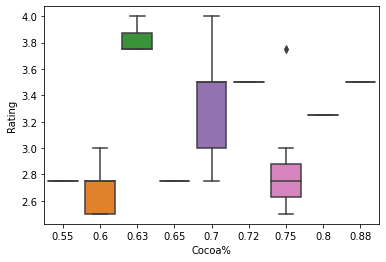

In [81]:
# checking the effect of country on rating
import seaborn as sns
sns.boxplot(x="Cocoa%",y="Rating",data=df2)

#### Relationship between Cocoa% and Rating
As we all can clearly see that the major rating share is acquired by chocolates with Cocoa percentage of 70. As the companies increase the percentage of cocoa in the chocolate, the rating for chocolate also declines. therefore, i will say that the best result for chocolate is 70% of cocoa. Although 63% cocoa is having good rating but still 70% is much larger stake. The another following figure also shows that that people are more likely to choose and like chocolate with 70% of the Cocoa.

Text(0, 0.5, 'Rating')

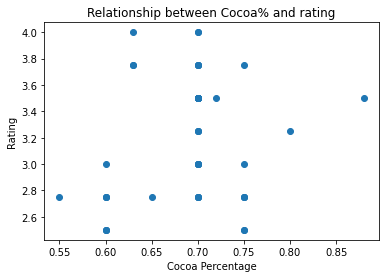

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
y=df2["Rating"]
x=df2["Cocoa%"]
plt.scatter(x,y)
plt.title("Relationship between Cocoa% and rating")
plt.xlabel("Cocoa Percentage")
plt.ylabel("Rating")

In [83]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [90]:
x=df2[['Cocoa%']]
y=df2[['Rating']]
lm.fit(x,y)
b0=lm.intercept_
b1=lm.coef_
b0

array([2.09192365])

In [91]:
b1

array([[1.59681]])

#### now that we are having value of b0 and b1. We can use this to calculate any value error.
#### the rating will be calculated by the formula:
#### Rating= 2.091+(1.59*x), x is given rating.

This all concludes that my client should be using cocoa value of 70% to best match the customer market segment.

## Recommendations and Conclusion:

My recommendations are to make the chocolate products using the cocoa percentage of the 70% . Also I noticed that there are a lot of competitors in this market segment. Therefore, to match the product for the customer, one should be improving taste and match atleast current taste of customers.